# **Lab 6: Runge-Kutta 2nd Order Method for Ordinary Differential Equations**<br>

Ordinary Differential Equation (ODE) is a differential equation consisting of one or more functions of a single independent variable and the derivatives of those functions. Finding derivatives analytically is a complex procedure, involving a lot of rules. Computers and calculators find derivatives using some sort of numerical methods. Here, our target is to estimate a function at discrete points given its differential equation using the **Runge-Kutta 2nd Order method**. An important thing to note here is that this method can only solve first order ODE of the form $$ \frac{dy}{dx}=f(x,y), y(x_0)=y_0 $$

In today's lab, we will be implementing the **Runge-Kutta 2nd Order method** for solving a first order ODE in python. Refer to the example in the lecture slide.

The following is the problem you need to solve.
<br>
A ball at $1200K$ is allowed to cool down in air at an ambient temperature of $300K$. Assuming heat is lost only due to radiation, the differential equation for the temperature of the ball is given by $$\frac{d\theta}{dt}=-2.2067\times 10^{-12} (\theta^4 - 81 \times 10^8), y(0)=1,\theta(0)=1200K$$ where $\theta$ is in $K$ and $t$ in seconds. Find the temperature at $t=480$ seconds using Runge-Kutta 2nd Order method. Assume a step size of $h=240$ seconds. Compare with the exact value.

##Task 1
Implement the bivariate function $f(t, \theta)$ and the algorthim for Runge-Kutta 2nd Order method. Use the **Heun's method** assumption $\displaystyle a_2 = \frac{1}{2}$.
$$\theta_{i+1} = \theta_i + \left( \frac{1}{2}k_1 +  \frac{1}{2}k_2\right)h$$
$$k_1 = f(t_i,\theta_i)$$
$$k_2 = f(t_i + h, \theta_i + k_1h)$$ where $h=t_{i+1}-t_i$ is the step size.

In [37]:
def f(t, theta):
    #Write your code here.

    res = -2.2067 * (10 ** - 12) *(theta**4 - 81 * (10 ** 8))
    return res

def RungeKutta2(x_0, y_0, h, x):
    #Write your code here.

    res = 0
    t = x_0
    theta = y_0
    while t != x:

      k1 = f(t, theta)
      k2 = f(t +h , theta + k1 * h )

      theta = theta + (k1/2 + k2/2) * h

      t+= h


    return theta

In [38]:
print(f'Temperature at t = 480s with step size h = 240s is {RungeKutta2(0,1200,240,480):.2f}K')

Temperature at t = 480s with step size h = 240s is 584.27K


Your answer should be $\approx 584.27K$.

##Task 2
Calculate the exact solution of the ODE. It is the root of the nonlinear equation
$$ 0.92593\ln\left( \frac{\theta-300}{\theta+300} \right) - 1.8519\tan^{-1}(0.333\times10^{-2}\theta) = -0.22067\times 10^{-3}t - 2.9282 $$ at $t=480$ seconds.

You can use your own root-finding algorithm or you can use the `fsolve()` function from the `scipy` package. (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

In [49]:
# Write your code here.
import numpy as np
from scipy.optimize import fsolve

def func(theta, t):
    res = (0.92593*np.log((theta - 300) / (theta + 300))) - (1.8519 * np.arctan(0.3333 * (10**-2) * theta)) + (0.22067 * (10 ** - 3) * t) + 2.9282
    return res

root = fsolve(func, 600, args=(480,))
print(root)

[647.56079893]


The exact value should be $\theta_{exact} \approx 647.57K$.

Now, approximate the value of $\theta(480)$ using different step sizes, such as $480, 240, 120, 60,$ and $30$. Calculate the Global Truncation Error $E_t$ and the Absolute Relative True Error $|\epsilon_t|\%$ in each case.

In [70]:
# Write your code here.
h = [480, 240, 120, 60, 30]
theta = [0, 0, 0, 0, 0]
Et = [0, 0, 0, 0, 0]
et_percent = [0, 0, 0, 0, 0]

print(f'h\ttheta\tEt\t|et|%')

def evaluate():
  exact = root
  for i in range(0, len(h)):
    theta[i] = RungeKutta2(0, 1200, h[i], 480)

    Et[i] = (exact - theta[i])

    et_percent[i] = abs(Et[i]/exact) * 100

    print(f'{h[i]}\t{theta[i]}\t{Et[i]}\t{et_percent[i]}')
evaluate()

h	theta	Et	|et|%
480	-393.86949676856057	[1041.4302957]	[160.8235547]
240	584.2684867703111	[63.29231216]	[9.77395671]
120	651.3490897129784	[-3.78829078]	[0.58500928]
60	649.9135621424234	[-2.35276321]	[0.363327]
30	648.2051155772971	[-0.64431664]	[0.09949902]


Your values should approximately match the values of this table.
<br>
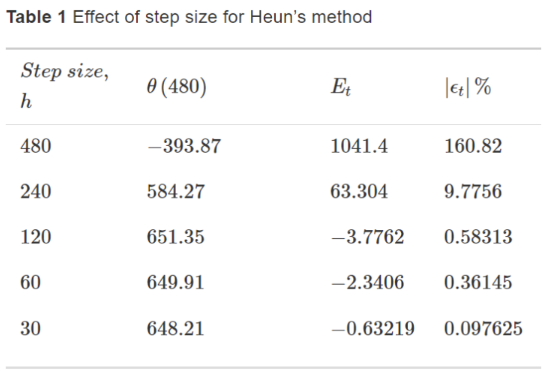

## Task 3
Generate a Temperature $(\theta)$ vs Step size $(h)$ plot which portrays the effect of step size in Runge-Kutta 2nd Order method. Use a different marker to represent the exact value.

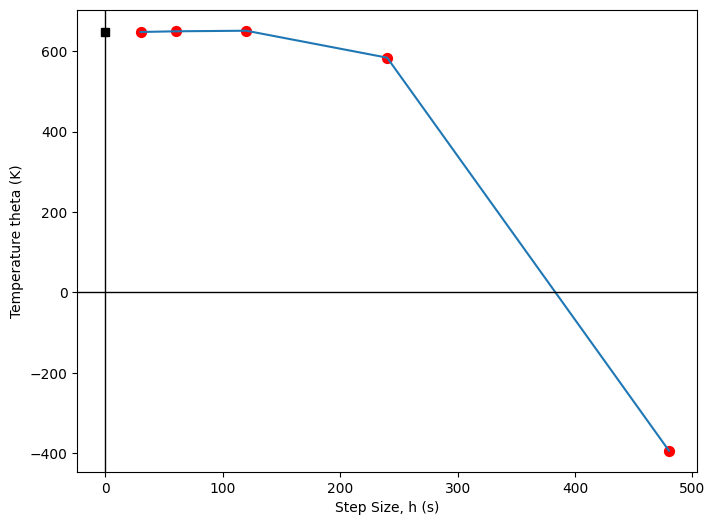

In [82]:
# Write your code here.

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6)) 
plt.plot(h, theta)
plt.plot(0, root, 's', color='black')

plt.scatter(h, theta, color='red', marker='o', s=50)

plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)


plt.xlabel("Step Size, h (s)")
plt.ylabel("Temperature theta (K)")
plt.show()

Your graph should look something like,
<br>
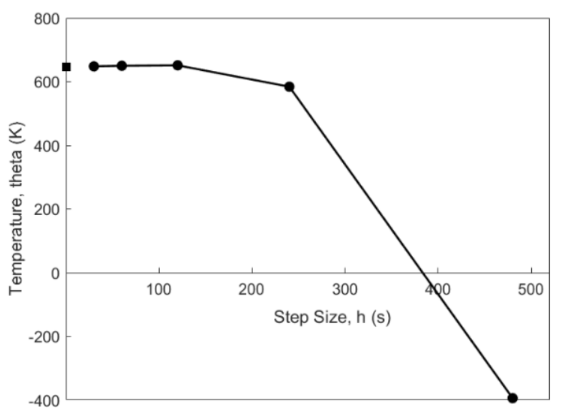

Genrerate a Temperature $\theta$ vs Time $t$ plot that compares the Runge-Kutta 2nd Order method approximations for different step sizes with the exact solution.

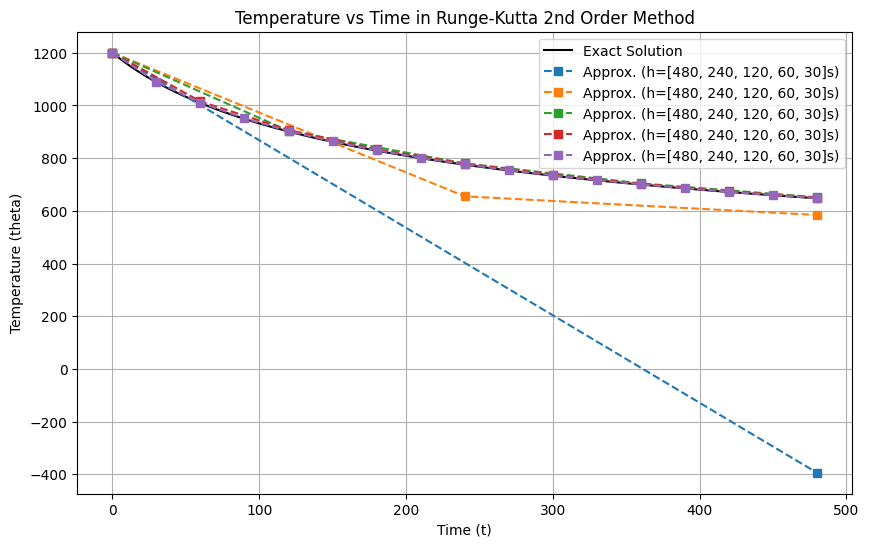

In [100]:
def RungeKutta2_Plot(t_0, theta_0, h, t_target):
    num_steps = int((t_target - t_0) / h)
    t = t_0
    theta = theta_0

    t_values = [t_0]
    theta_values = [theta_0]

    for _ in range(num_steps):
        k1 = f(t, theta)
        k2 = f(t + h, theta + k1 * h)
        theta += 0.5 * (k1 + k2) * h
        t += h

        t_values.append(t)
        theta_values.append(theta)

    return t_values, theta_values

t_target = 480
plt.figure(figsize=(10, 6))

exact_t_values, exact_theta_values = RungeKutta2_Plot(0, 1200, 1, t_target)
plt.plot(exact_t_values, exact_theta_values, label='Exact Solution', color='black')

for i in h:
    t_values, theta_values = RungeKutta2_Plot(0, 1200, i, t_target)
    plt.plot(t_values, theta_values, label=f'Approx. (h={h}s)',linestyle='dashed', marker='s')

plt.xlabel('Time (t)')
plt.ylabel('Temperature (theta)')
plt.title('Temperature vs Time in Runge-Kutta 2nd Order Method')
plt.legend()
plt.grid(True)
plt.show()


Your graph should look something like,
<br>
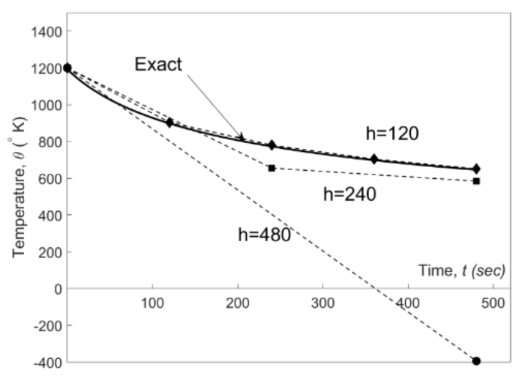